In [344]:
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

import geomstats.backend as gs
from geomstats.geometry.poincare_ball import PoincareBall
from geomstats.geometry.hyperbolic import Hyperbolic
from geomstats.geometry.hypersphere import Hypersphere

In [407]:
CURVATURE = -100
scale = 1/np.sqrt(-CURVATURE)

In [408]:
pb_manifold = PoincareBall(dim=2, scale=scale)
pb_metric = pb_manifold.metric

In [409]:
N = 11
points = pb_manifold.random_uniform(N, 0.1)
points_dist = pb_metric.dist_pairwise(points)

In [410]:
points

array([[ 0.04882567, -0.0217167 ],
       [ 0.0438775 , -0.02136312],
       [-0.02630758, -0.02124106],
       [-0.01361901,  0.04115643],
       [-0.01209446, -0.02182378],
       [-0.02282932,  0.0115816 ],
       [ 0.02445213,  0.04343853],
       [ 0.04161571, -0.0487102 ],
       [-0.04111375, -0.00823668],
       [ 0.03979361, -0.04268003],
       [-0.00060033, -0.02502584]])

In [411]:
G = nx.Graph(points_dist)
T = nx.minimum_spanning_tree(G)

In [412]:
weights = [e[2]['weight'] for e in T.edges(data=True)]

In [413]:
T.get_edge_data(0,1)

{'weight': 0.0009947596117854118}

In [414]:
dist_edges = {}
for i in range(N):
    for j in range(N):
        d = points_dist[i][j]
        if d == 0: continue
        if d in dist_edges:
            dist_edges[d].append((i, j))
        else:
            dist_edges[d] = [(i, j)]

In [415]:
graphs = []
g = nx.Graph()
for i in range(N):
    g.add_node(i)

In [416]:
for d in sorted(dist_edges):
    g = g.copy()
    for e in dist_edges[d]:
        g.add_edge(*e)
    graphs.append(g.copy())

In [417]:
eccs = []
for i in range(len(graphs)):
    if nx.is_connected(graphs[i]):
        ecc_sum = sum([nx.eccentricity(graphs[i], j) for j in range(N)])
        #print(i, ecc_sum/N)
        eccs.append(ecc_sum/N)
    else:
        #print(i, "not connected")
        pass

Text(0, 0.5, 'Average Eccentricity')

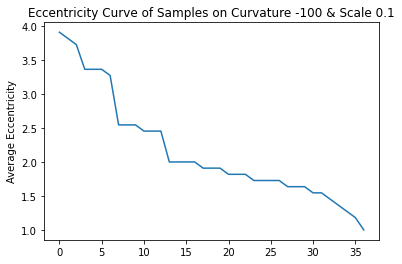

In [418]:
plt.plot(eccs)
plt.title("Eccentricity Curve of Samples on Curvature {} & Scale {}".format(CURVATURE, scale))
plt.ylabel("Average Eccentricity")